# Defining Params

In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import json
from PIL import Image
import seaborn as sns
import pandas as pd
from keras.models import model_from_json
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
batch_size = 32
img_height=80
img_width = 256
approx_fold_size = 1000

# Load Model

In [4]:
path = "/media/romulo/6237-3231/curated_model_three_classes_unfrozen_layers_v1/"
model_definition_location = path+"/curated_model_three_classes_unfrozen_layers_v1.json"
model_weights_location = path+"/curated_model_three_classes_unfrozen_layers_v1.h5"
model_labels_location = path+"/curated_model_three_classes_unfrozen_layers_v1_class_indices.json"
test_folder = "/media/romulo/6237-3231/curated_soundflux_three_classes/test"

In [5]:
with open(model_definition_location, 'r') as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights(model_weights_location)
with open(model_labels_location, 'r') as json_file:
    label_map = json.load(json_file)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Evaluate Model

In [6]:
datagen = ImageDataGenerator(rescale=1./255,
                            #rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.2,
                            zoom_range=0.3,
                            #horizontal_flip=True,
                            #vertical_flip=True,
                            fill_mode='nearest')

In [7]:
test_generator = datagen.flow_from_directory(test_folder,
                                          target_size = (img_height,img_width),
                                          class_mode = 'categorical',
                                          batch_size = batch_size,
                                          shuffle=False, 
                                          seed=7)

Found 137 images belonging to 3 classes.


In [8]:
steps = np.ceil(len(test_generator.classes)/batch_size)

In [9]:
predictions = model.predict_generator(test_generator,
                                      steps = steps,
                              verbose=True)

5/5 [==============================] - 13s 3s/step


# Confusion Matrix

In [10]:
y_pred = np.argmax(predictions, axis=1)

In [11]:
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

Confusion Matrix
[[26  1  0]
 [ 3 60  1]
 [ 2  1 43]]


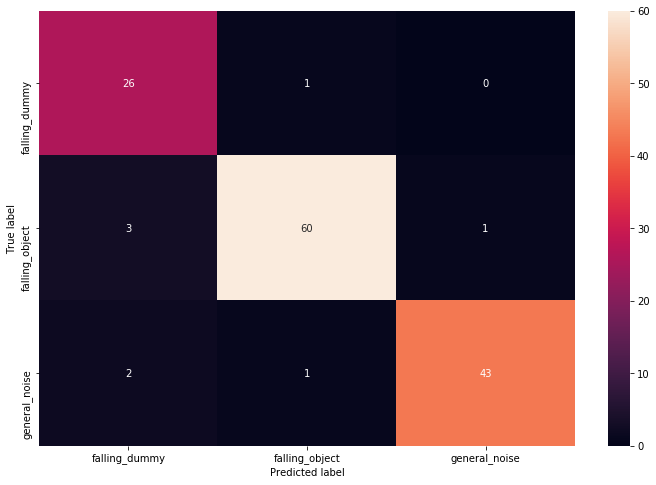

In [12]:
cm_df = pd.DataFrame(cm,
                     index = test_generator.class_indices.keys(), 
                     columns = test_generator.class_indices.keys())

plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, 
                            target_names = test_generator.class_indices.keys()))

Classification Report
                precision    recall  f1-score   support

 falling_dummy       0.84      0.96      0.90        27
falling_object       0.97      0.94      0.95        64
 general_noise       0.98      0.93      0.96        46

     micro avg       0.94      0.94      0.94       137
     macro avg       0.93      0.95      0.93       137
  weighted avg       0.95      0.94      0.94       137

